# Bicycle Accidents in Great Britain (1979 to 2018) 
### Programming for Data Science   |   Mohammad Idris Attal

In this project I will use the dataset regarding the Bicycle Accidents in Great Britain (1979 to 2018). This Dataset contains data such as the accident_index, number_of_vehicles_involved, number_of_casualties, date and time of accident, speed_limit, road_and_weather_conditions, day of the accident and finally the road_type in which the accident took place.


With the help of provided dataset we can analyze different aspects such as analyzation based on number of casualties, number of vehicles, road conditions, speed limit and so on. In this project, the intention was to analyze the number of casualties for each year. In the of phase of Machine Learning and model evaluation, Linear and Polynominal regression along with Random Forest algorithms are applied to predict number of causalities for future years based on the total number of causalities per year. The intention of appliction of different models was to get the best optimal solution possible. 


### Formation of the Dataset

**Accident_Index,	Number_of_Vehicles,	Number_of_Casualties,	Date,	Time,	Speed_limit,	Road_conditions,	Weather_conditions,	Day,	Road_type,	Light_conditions,   Gender,	Severity,	Age_Grp**

### 1. Importing Essential Libraries

In [10]:
#install these packages
#pip3 install pandas-profiling
#pip3 install plotly

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pandas_profiling import ProfileReport


### 2. Importing the Bicycle Accidents data-set

In [3]:
accident = pd.read_csv('./sets/accidents.csv')
biker = pd.read_csv('./sets/bikers.csv')

In [4]:
accident.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [5]:
biker.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


#### combining of two csv files of the same data-set
we combine the biker.csv file with accidents.csv file to make the data-set as complete, these two csv files are part of the 
same dataset but since they are in different files so, we need to combine them.

In [6]:
df = accident.merge(biker, on='Accident_Index', how='left')

In [7]:
df.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55


### 3. Analyzation of our data-set (Profile Report)

Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.

In [10]:
# for full explorative report please uncomment this part
# ProfileReport(df, title="Bicycle Accident", explorative=True)

# for minimal report
ProfileReport(df, title="Bicycle Accident", minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Data manipulation for getting number of casulaties per year
Based on our prediction todos that we diefined we need to reterieve the total sum of number_of_casulaites based on each year.

In [49]:
# with the help of this lambda function we retreieve the year from the date          
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

# we sum the Number_of_Casualties result based on group by on each year
df_peryearcas = df.groupby('Year')['Number_of_Casualties'].sum().reset_index()

In [50]:
df_peryearcas.head()

,Year,Number_of_Casualties
0,1979,24007
1,1980,25206
2,1981,25723
3,1982,28782
4,1983,31010


In [51]:
# In order to understand better our data model, we visulize it with the help of plotting
fig = px.scatter(df_peryearcas, x="Year", y="Number_of_Casualties")
fig.show()

### 5- Prediction Model Application
Based on our data we will apply the three most famous prediction model on our data and then compare the accurecy rate of prediction based on each model

### 5.1 Linear Regression

In [52]:
from sklearn.model_selection import train_test_split # Function for random splitting of data set
from sklearn import linear_model # Function to create linear regression models
from sklearn.metrics import mean_squared_error, r2_score # Functions used to evaluate models

In [53]:
# Partition the dataset into training and testing subset
xTrain, xTest, yTrain, yTest = train_test_split(df_peryearcas['Year'], # First argument is the whole observation set including only the best features
                                                df_peryearcas['Number_of_Casualties'], # Second is the corresponding regressand (Chance of Admit)
                                                test_size=0.33, # Use 33% of the samples for testing
                                                random_state=42) # The random state tells the function to use the 
                                                                 # same random samples whenever its assigned the 
                                                                 # number 42. So your experiments can be replicated

##### 5.1.1 Visual Representation  of Training and Testing Division
In order to understand better our data spliting we visulize it via the ploting

In [54]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=xTrain, y=yTrain,
                    mode='markers',
                    name='Training Data'))
fig.add_trace(go.Scatter(x=xTest, y=yTest,
                    mode='markers',
                    name='Testing Data'))

fig.show()

##### 5.1.2 Create Regiression model

In [55]:
# Import the function to create linear regression model from the sklearn library
from sklearn import linear_model 

# Create linear regression instance and assign it to the variable 'linModel' 
linModel = linear_model.LinearRegression()

# Train the model using the training dataset
linModel.fit(X=xTrain.values.reshape(-1, 1), y=yTrain.values.reshape(-1, 1))

LinearRegression()

In [56]:
# Test the model
linPrediction = linModel.predict(xTest.values.reshape(-1, 1))

In [57]:
#let's print the first few results
print("actual value", "predicted value")
i = 1
while i < 10:
    print(yTest.values[i],"       ", linPrediction[i])  
    i += 1

actual value predicted value
24512         [22784.56728232]
24405         [23101.08198044]
14823         [19619.4203011]
31010         [26582.74365979]
24434         [24050.62607481]
18311         [16137.75862176]
14749         [19302.90560298]
17358         [15504.72922552]
27087         [25949.71426354]


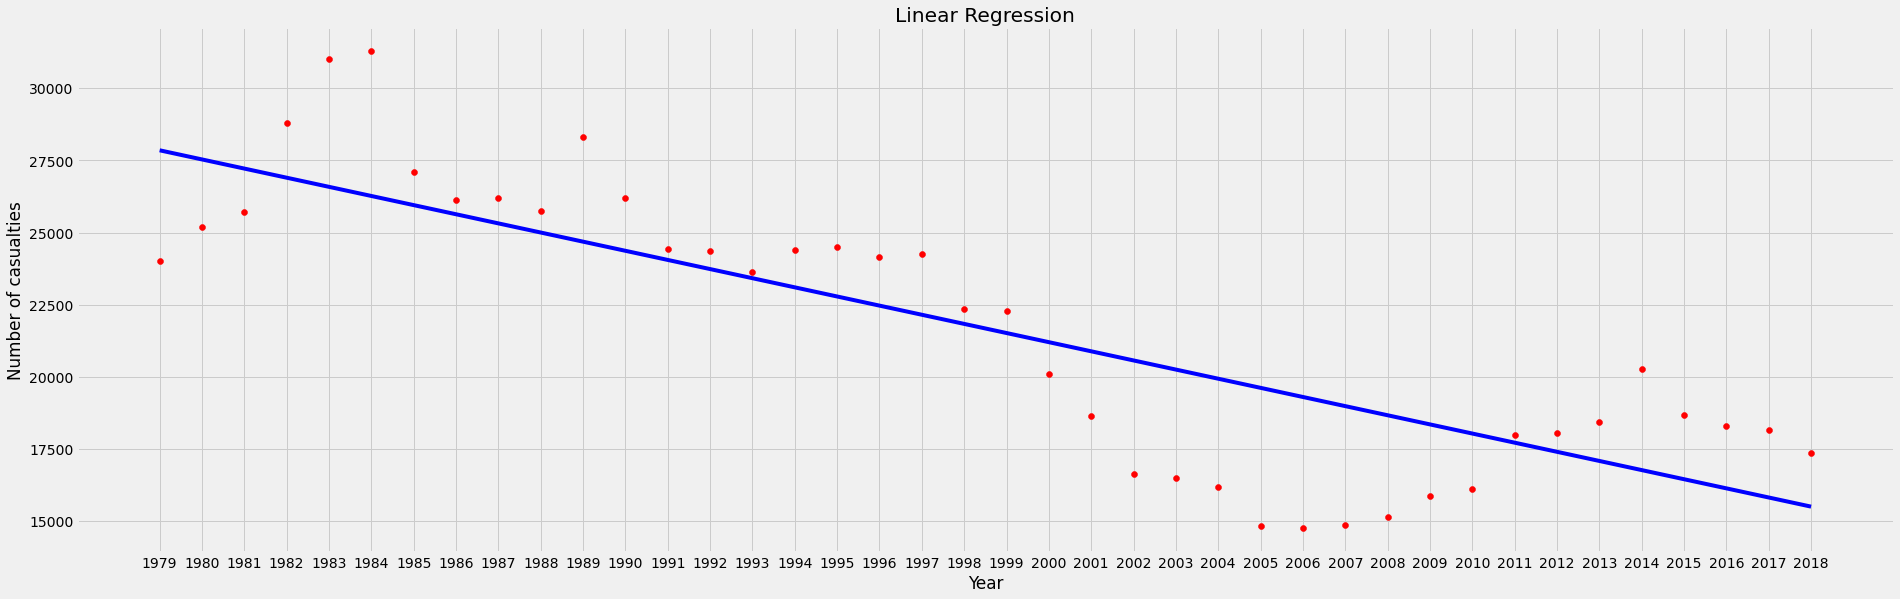

In [58]:
# Representation of our model in shape Linear Regression


plt.scatter(df_peryearcas['Year'],df_peryearcas['Number_of_Casualties'],color='red')
plt.plot(df_peryearcas['Year'],linModel.predict(df_peryearcas['Year'].values.reshape(-1, 1)),color='blue')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Number of casualties')
plt.rcParams["figure.figsize"] = (29,9)
plt.show()

##### 5.1.3 The Metrics for Evaluating Performance

In [59]:
mseLin = mean_squared_error(yTest.values, linPrediction)
print('The Mean Squared Error = {0:.3f}'.format(mseLin))

The Mean Squared Error = 6894820.703


##### 5.1.4 The  𝑅2  (pronounced r-squared)

In [60]:
# Approximate the variance of error
r2_Lin = r2_score(yTest.values, linPrediction)
print('Goodness of Fit: {0:.3f}'.format(r2_Lin))

Goodness of Fit: 0.724


##### 5.1.5 Checking Prediction Result

In [61]:
linModel.predict([[1985]])[0]
# linModel.predict([[2022]])[0]

array([25949.71426354])

###  5.2 Polynomial Regression

In [25]:
# Partition the dataset into training and testing subset
PxTrain, PxTest, PyTrain, PyTest = train_test_split(df_peryearcas['Year'], # First argument is the whole observation set including only the best features
                                                df_peryearcas['Number_of_Casualties'], # Second is the corresponding regressand (Chance of Admit)
                                                test_size=0.33, # Use 33% of the samples for testing
                                                random_state=42) # The random state tells the function to use the 
                                                                 # same random samples whenever its assigned the 
                                                                 # number 42. So your experiments can be replicated

####  5.2.1 Testing with different degress
We test our modle with different degrees to get the best optimal solution

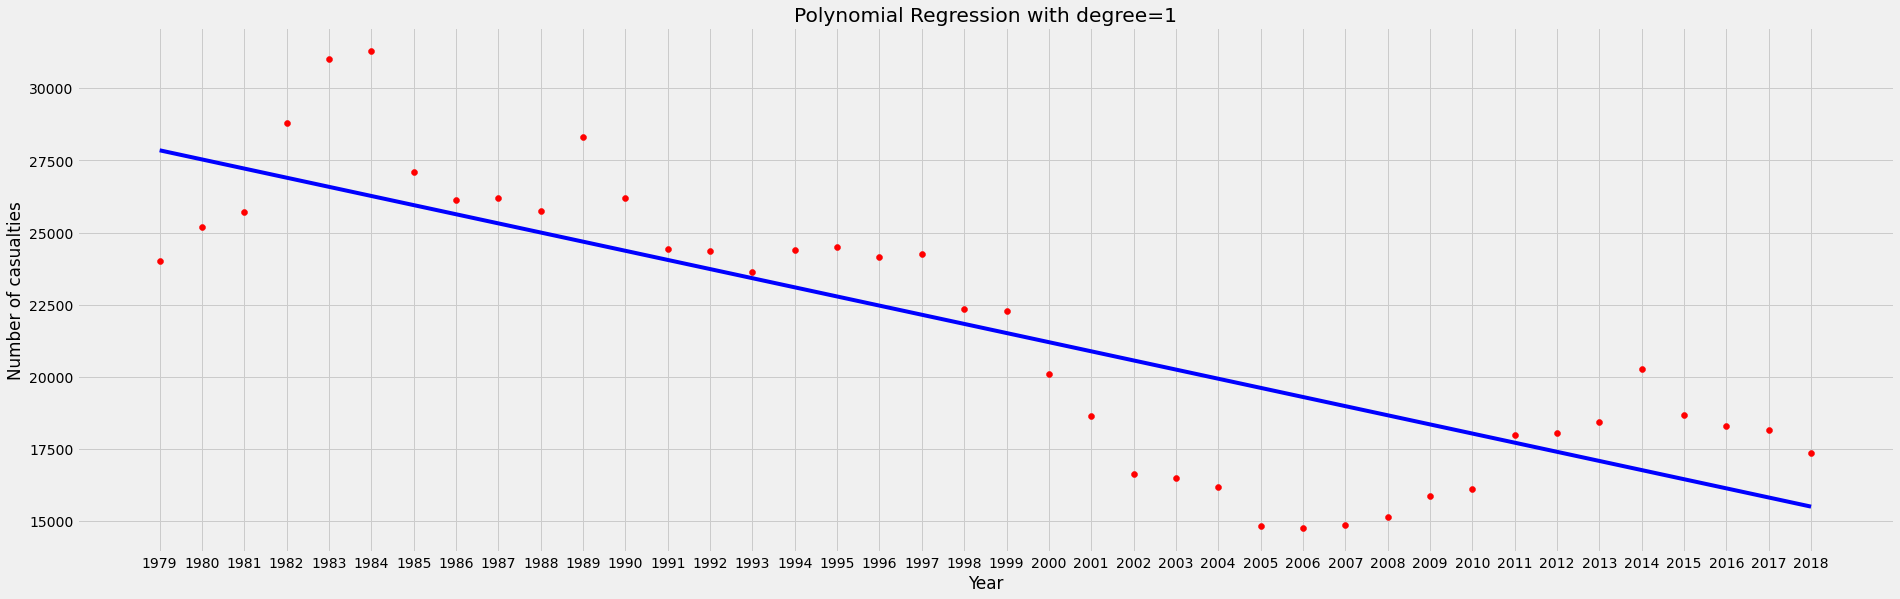

R2 score : 0.70
Mean squared error: 6730205.54


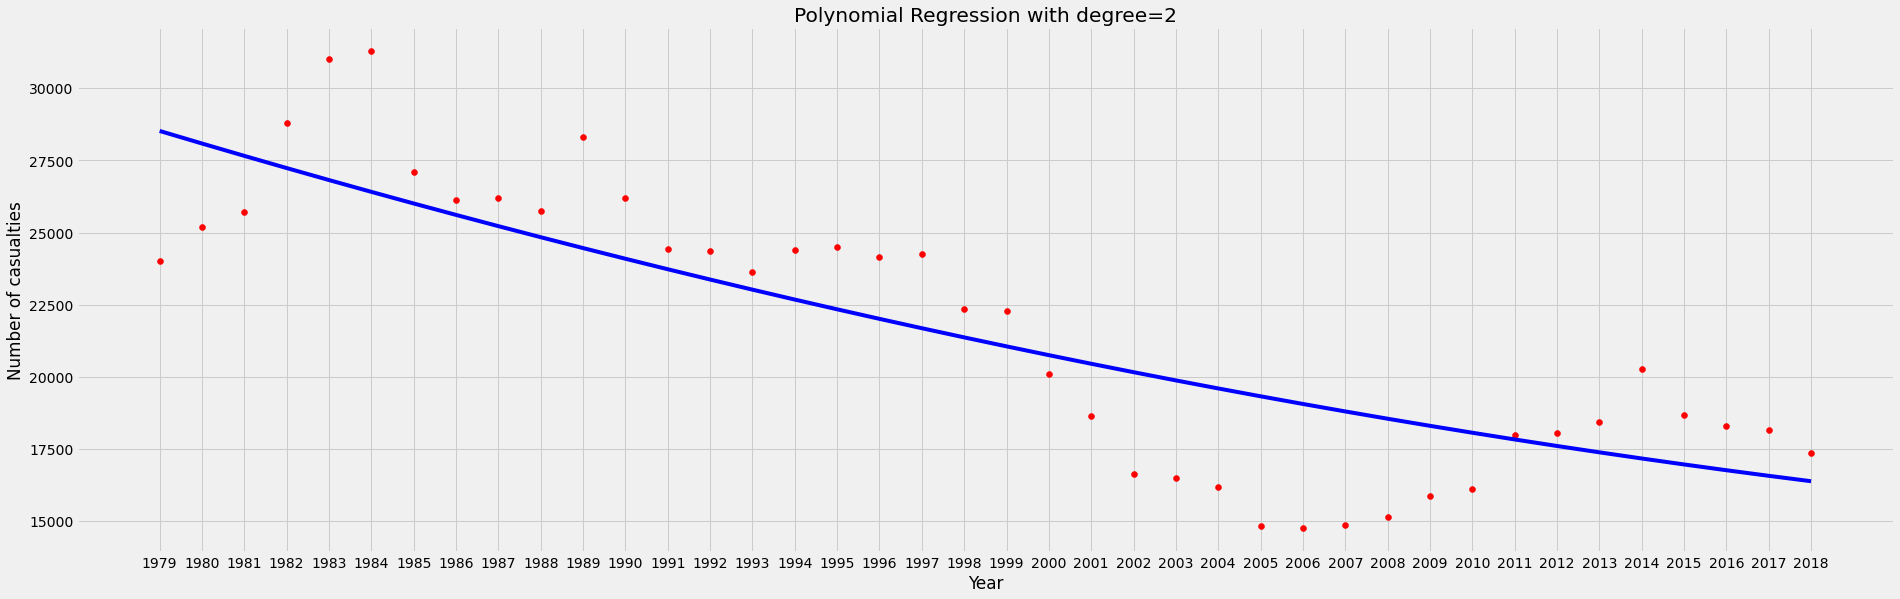

R2 score : 0.71
Mean squared error: 6402172.30


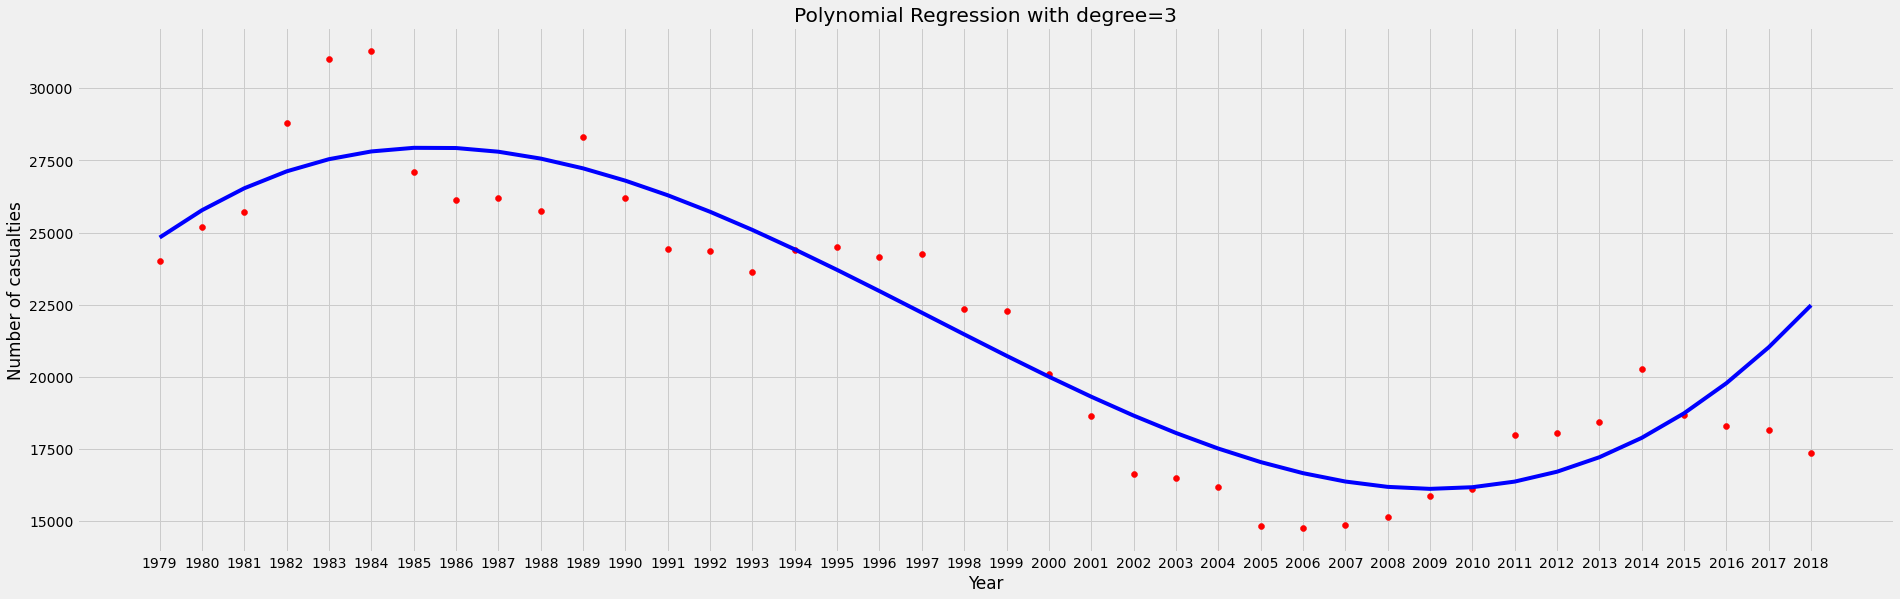

R2 score : 0.86
Mean squared error: 3137401.76


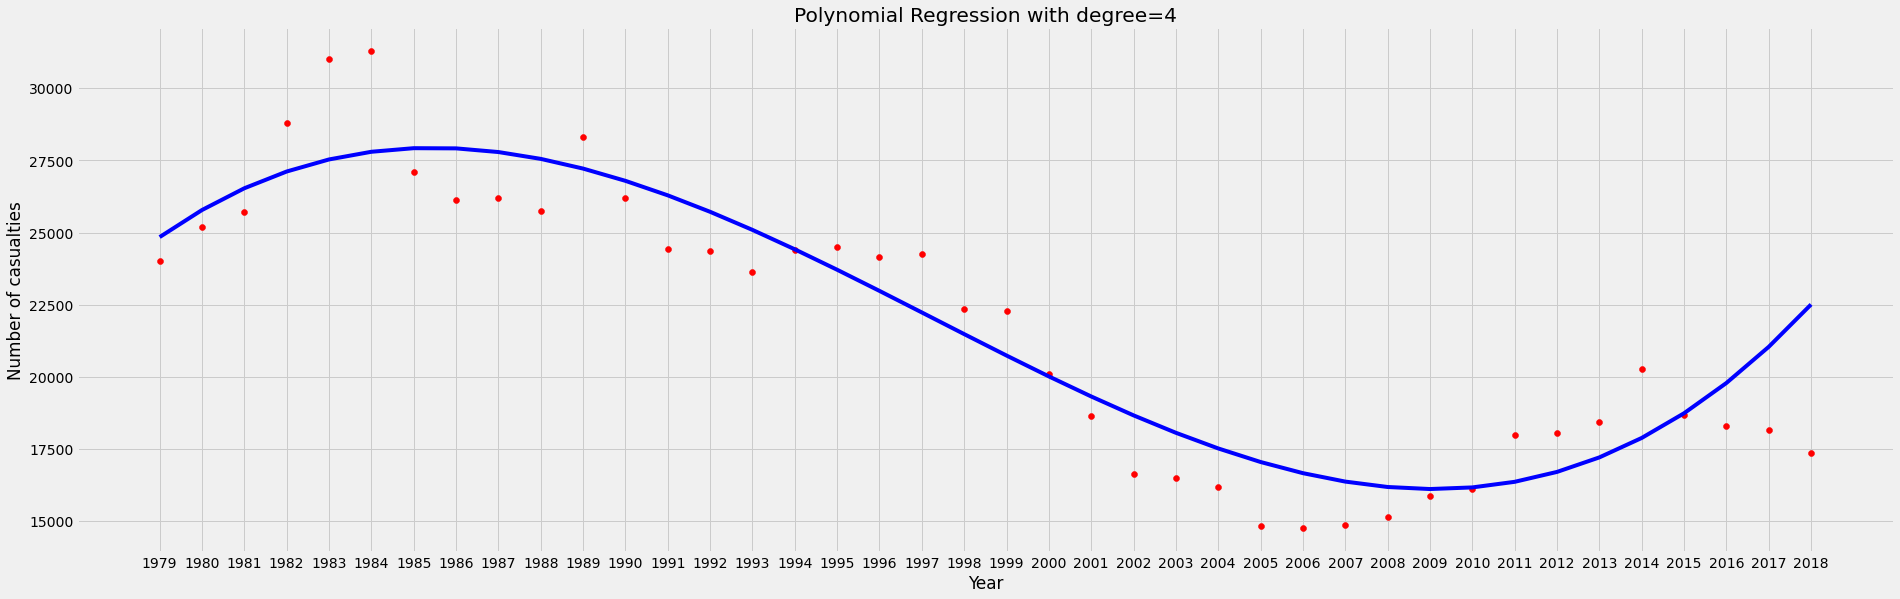

R2 score : 0.86
Mean squared error: 3148710.43


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


for i in range(1,5):
    
    poly=PolynomialFeatures(degree=i)
    X_poly=poly.fit_transform(PxTrain.values.reshape(-1, 1))
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,PyTrain)
    
    plt.scatter(df_peryearcas['Year'],df_peryearcas['Number_of_Casualties'],color='red')
    plt.plot(df_peryearcas['Year'], lin_reg.predict(poly.fit_transform(df_peryearcas['Year'].values.reshape(-1, 1))),color='blue')
    plt.title('Polynomial Regression with degree='+ str(i))
    plt.xlabel('Year')
    plt.ylabel('Number of casualties')
    plt.rcParams["figure.figsize"] = (29,9)
    plt.show()
    
    print("R2 score : %.2f" % r2_score(df_peryearcas['Number_of_Casualties'].values.reshape(-1, 1),lin_reg.predict(poly.fit_transform(df_peryearcas['Year'].values.reshape(-1, 1)))))
    print("Mean squared error: %.2f" % mean_squared_error(df_peryearcas['Number_of_Casualties'].values.reshape(-1, 1),lin_reg.predict(poly.fit_transform(df_peryearcas['Year'].values.reshape(-1, 1)))))

##### 5.2.2 Choosing the degree for our model

In [62]:
# Polynomial curve of degree 4 is a perfect match so we train our model with this degree
poly_reg4=PolynomialFeatures(degree=4)
X_poly4=poly_reg4.fit_transform(PxTrain.values.reshape(-1, 1))
lin_reg_4=LinearRegression()
lin_reg_4.fit(X_poly,PyTrain)


LinearRegression()

In [63]:
polyPrediction = lin_reg_4.predict(poly_reg4.fit_transform(df_peryearcas['Year'].values.reshape(-1, 1)))


In [64]:
#let's print the first few results
print("actual_value","predicted_value")
i = 1
while i < 10:
    print(PyTest.values[i],"       ", polyPrediction[i])  
    i += 1

actual_value predicted_value
24512         25779.807320594788
24405         26533.32793521881
14823         27113.79354572296
31010         27531.701924324036
24434         27797.567006111145
18311         27921.918877601624
14749         27915.303753852844
17358         27788.284026145935
27087         27551.438210487366


##### 5.2.3 The Metrics for Evaluating Performance

In [65]:
mseLin = mean_squared_error(df_peryearcas['Number_of_Casualties'].values.reshape(-1, 1),lin_reg_4.predict(poly.fit_transform(df_peryearcas['Year'].values.reshape(-1, 1))))
print('The Mean Squared Error = {0:.3f}'.format(mseLin))

The Mean Squared Error = 3148710.428


##### 5.2.4 The  𝑅2  (pronounced r-squared)

In [66]:
# Approximate the variance of error
r2_Lin = r2_score(df_peryearcas['Number_of_Casualties'].values.reshape(-1, 1),lin_reg_4.predict(poly.fit_transform(df_peryearcas['Year'].values.reshape(-1, 1))))
print('Goodness of Fit: {0:.2f}'.format(r2_Lin))

Goodness of Fit: 0.86


##### 5.2.5 Checking Prediction Result

In [67]:
lin_reg_4.predict(poly_reg4.fit_transform([[1985]]))

array([27921.9188776])

### 5.3 Random Forest Regressor

In [68]:
df_peryearcas.head()

,Year,Number_of_Casualties
0,1979,24007
1,1980,25206
2,1981,25723
3,1982,28782
4,1983,31010


In [75]:
# Partition the dataset into training and testing subset
RxTrain, RxTest, RyTrain, RyTest = train_test_split(df_peryearcas['Year'], # First argument is the whole observation set including only the best features
                                                df_peryearcas['Number_of_Casualties'], # Second is the corresponding regressand (Chance of Admit)
                                                test_size=0.33, # Use 20% of the samples for testing
                                                random_state=42) # The random state tells the function to use the 
                                                                 # same random samples whenever its assigned the 
                                                                 # number 42. So your experiments can be replicated

In [76]:
# import 
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(RxTrain.values.reshape(-1, 1), RyTrain.values.reshape(-1, 1))
predictions = random_forest.predict(RxTest.values.reshape(-1, 1))

In [77]:
#let's print the first few results
print("actual_value","predicted_value")
i = 1
while i < 10:
    print(RyTest.values[i],"       ", predictions[i])  
    i += 1

actual_value predicted_value
24512         24028.69
24405         23831.31
14823         16119.37
31010         28884.64
24434         26632.68
18311         18714.13
14749         15132.55
17358         18568.84
27087         29575.67


#### 5.3.1 The Metrics for Evaluating Performance

In [78]:
mseLin = mean_squared_error(RyTest.values, predictions)
print('The Mean Squared Error = {0:.3f}'.format(mseLin))

The Mean Squared Error = 1587100.006


#### 5.3.2 The  𝑅2  (pronounced r-squared)

In [79]:
# Approximate the variance of error
r2_Lin = r2_score(RyTest.values, predictions)
print('Goodness of Fit: {0:.3f}'.format(r2_Lin))

Goodness of Fit: 0.936


#### 5.3.3 Checking Prediction Result

In [80]:
random_forest.predict([[1985]])[0]

29575.67

### 6. Conclusion
As a result of working with this dataset, we have achieved the required skills and knowledge to manipulate and train the data to get the required result that we want such as prediction of number of casulities of bicycle  accidents based on each year.
In addition, this expermintation gives me the knowledge and courage to further play and proceed with this dataset and explore new results in future, such as the consideration of invloving more columns of dataset and also try to apply new algorithm to further increase prediction accurecy.